## Задачи к главе 2

### 2.1

In [4]:
import numpy as np

def print_m_p25_p75(m, p25, p75):
    print('median = {0:.2f}, p25 = {1:.2f}, p75 = {2:.2f}'.format(m, p25, p75))

def get_m_p25_p75(vals, printing=False):
    m = np.median(vals)
    p25 = np.percentile(vals, 25)
    p75 = np.percentile(vals, 75)
    if printing:
        print_m_p25_p75(m, p25, p75)
    return (m, p25, p75)

def print_mean_std(m, std):
    print('mean = {0:.2f}, std = {1:.2f}'.format(m, std))

def get_mean_std(vals, printing=False):
    m, std = np.mean(vals), np.std(vals)
    if printing:
        print_mean_std(m, std)
    return (m, std)

vals = np.asarray([0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,5,5,5,5,6,7,9,10,11], dtype=np.float)
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 2.00, p25 = 1.00, p75 = 5.00
mean = 3.09, std = 2.84


### 2.2

In [5]:
vals = np.asarray([289,203,359,243,232,210,251,246,224,239,220,211])
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 235.50, p25 = 217.75, p75 = 247.25
mean = 243.92, std = 41.21


### 2.3

In [6]:
vals = np.asarray([1.2,1.4,1.6,1.7,1.7,1.8,2.2,2.3,2.4,6.4,19.0,23.6])
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 2.00, p25 = 1.67, p75 = 3.40
mean = 5.44, std = 7.27


### 2.4

Распределение равномерное

In [7]:
vals = [1,2,3,4,5,6]
print('mean = {0:.2f}'.format(np.mean(vals)))

mean = 3.50


### 2.5

mean = 3.85, std = 1.15


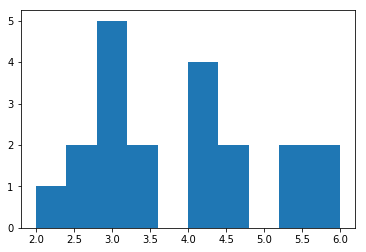

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(42)

count = 20

scores1, scores2 = np.random.randint(1,7, count), np.random.randint(1,7, count)
scores=np.array([scores1, scores2]).reshape((-1,2))
scores_means = np.mean(scores, axis=1)

plt.hist(scores_means)

_,_= get_mean_std(scores_means, True)

### 2.6

Допустим распределение числа авторов не зависит от года, т.е. мы имеем 4 выборки из одной генеральной совокупности, посмотрим как распределены средние этих выборок

mean = 3.00, std = 1.13


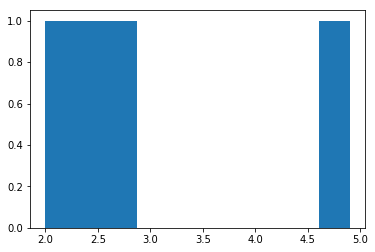

In [13]:
means = np.asarray([2.0, 2.3, 2.8, 4.9])
_ = plt.hist(means)

_,_= get_mean_std(means, True)

По 4 выборкам конечно сложно судить о характере распределения, в целом std не сильно большое для 4-х значений, т.е. std ген совокупности в таком случае должен быть примерно в 2 раза больше - т.е. около 2-х. Т.к. sqrt(4)=2

Попробуем зайти с другой стороны.
У статьи есть минимум 1 автор, следовательно минимальное значения для распределения это 1. От него до среднего значения, чтобы оно выглядело как нормальное должно быть 2 стандартных отклонения.
В первом случае и втором случаях от 1 до среднего меньше одного std.
Значит большинство значений лежит слева и далее вытянуто убывает вправо.
В третьем случае похоже на нормальное.
Четвёртый случай похож на первые 2.

К тому же средние данных выборок, хотя их всего 4, не образуют нормального распределения, а просто возрастают.

Попробуем сэмулировать эти 4 ситуации.

mean = 2.00, std = 1.40


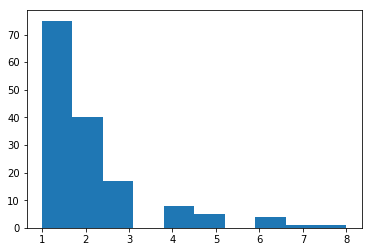

In [10]:
vals1 = np.concatenate([[1]*75, [2]*40, [3]*17, [4]*8, [5]*5, [6]*4, [7]*1, [8]*1])
_,_= get_mean_std(vals1, True)
len(vals1)

_ = plt.hist(vals1)

Первый случай показывает пример такого вида распределения.
Остальные 3 случая видимо похожи на него, просто возрастает доля статей с большим числом авторов
В четвёртом похоже на выброс, когда есть статья с аномально большим числом авторов:

mean = 4.90, std = 7.33


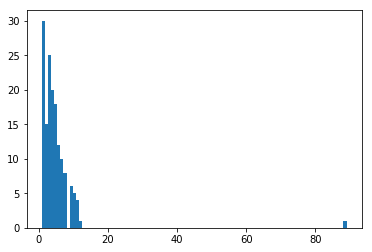

In [11]:
vals4 = np.concatenate([[1]*30, [2]*15, [3]*25, [4]*20,
                        [5]*18, [6]*12, [7]*10, [8]*8,
                       [9]*6, [10]*5, [11]*4, [12]*1,
                       [89]*1])
_,_= get_mean_std(vals4, True)
len(vals4)

_ = plt.hist(vals4, bins=100)

## Задачи к главе 3

Полезная ссылка для расчёта - http://statpages.info/anova1sm.html

Хотя в книге есть ответы

### 3.1

In [23]:
from scipy import stats
import math


def calc_tstd(means):
    m = np.mean(means)
    sq_sum = np.sum(np.square(np.full(len(means), m) - means)) / (len(means) - 1)
    return math.sqrt(sq_sum)

def calc_f(n, means, stds, se=False, printing=True):
    if se:
        sq_n = math.sqrt(n)
        stds = [v*sq_n for v in stds]
    within_d = np.mean(np.square(stds))
    mean_std = calc_tstd(means) # stats.tstd(means)
    inter_d = (mean_std**2)*n
    f = inter_d/within_d
    if printing:
        print('F = {0:.2f}, w_d = {1:.2f}, i_d = {2:.2f}, m_sd = {3:.2f}'.format(f, within_d, inter_d, mean_std))
    return f

# test with example of women sport and menstruation
calc_f(26, [11.5, 10.1, 9.1], [1.3, 2.1, 2.4])

# 2 groups and n=21, so inter df = 1 and inner df = 20*2 = 40
f = calc_f(21, [8.5, 13.9], [4.7, 4.1])

def print_f(f, dfn, dfd):
    f_005 = stats.f.ppf(q=1-0.05, dfn=dfn, dfd=dfd)
    f_001 = stats.f.ppf(q=1-0.01, dfn=dfn, dfd=dfd)
    print('F = {0:.2f}, F (0.05) = {1:.2f}, F (0.01) = {2:.2f}'.format(f, f_005, f_001))
    
print_f(f, 1, 40)

F = 9.56, w_d = 3.95, i_d = 37.79, m_sd = 1.21
F = 15.74, w_d = 19.45, i_d = 306.18, m_sd = 3.82
F = 15.74, F (0.05) = 4.08, F (0.01) = 7.31


Видим, что F больше чем критического значение при уровне значимости 0.01, поэтому отклоняем нулевую гипотезу и считаем что получили статичтически значимое отличие между данными группами

### 3.2

In [58]:
f = calc_f(200, [3.17, 2.72, 2.63, 2.29, 2.12], [0.74, 0.71, 0.73, 0.70, 0.72])
print_f(f, 5-1, 199*5)

F = 64.18, w_d = 0.52, i_d = 33.29, m_sd = 0.41
F = 64.18, F (0.05) = 2.38, F (0.01) = 3.34


По данным видно, что высока вероятность, что результат в группах отличается

### 3.3

In [59]:
f = calc_f(70, [43.3, 58.0, 64.8], [14.2, 17.7, 14.3])
print_f(f, 3-1, 69*3)

F = 35.25, w_d = 239.81, i_d = 8453.43, m_sd = 10.99
F = 35.25, F (0.05) = 3.04, F (0.01) = 4.71


Есть статистическая значимость различий между группами

### 3.4

In [69]:
f = calc_f(36, [85.1, 83.5, 80.9, 72.6, 60, 73.5, 63.8], [0.3, 1.0, 0.6, 0.7, 1.3, 0.7, 2.6], se=True)
print_f(f, 7-1, 35*7)

F = 60.38, w_d = 55.95, i_d = 3378.24, m_sd = 9.69
F = 60.38, F (0.05) = 2.14, F (0.01) = 2.88


Есть статистическая значимость различий между группами

### 3.5

In [70]:
f = calc_f(36, [51.4, 59.4], [3.2, 3.9], se=True)
print_f(f, 2-1, 35*2)

F = 2.51, w_d = 458.10, i_d = 1152.00, m_sd = 5.66
F = 2.51, F (0.05) = 3.98, F (0.01) = 7.01


Различия между группами НЕ являются статистически значимыми

### 3.6

In [43]:
f = calc_f(16, [49.9, 51.2, 57.3, 46.4, 43.9, 65.2], [14.3, 13.4, 14.9, 14.7, 16.5, 20.5])
print_f(f, 6-1, 15*6)

F = 3.85, w_d = 252.44, i_d = 971.99, m_sd = 7.79
F = 3.85, F (0.05) = 2.32, F (0.01) = 3.23


Различия между группами являются статистически значимыми

### 3.7

In [80]:
def calc_f_n(nums, means, stds, se=True, pr=True):
    if se:
        stds = [s*math.sqrt(ni) for ni,s in zip(nums, stds)]
    n = np.sum(nums)
    k = len(nums)
    s_in = np.sum([(ni-1)*(s**2) for ni, s in zip(nums, stds)])
    v_in = n - k
    s_out = np.sum([ni*(m**2) for ni, m in zip(nums, means)]) - (np.sum([ni*m for ni, m in zip(nums, means)]))**2 / n
    v_out = k - 1
    f = (s_out / v_out) / (s_in / v_in)
    if pr:
        print('F = {0:.2f}'.format(f))
    return f
nums = [30, 13, 20, 20]
f = calc_f_n(nums, [15, 15, 9, 7], [1, 2, 2 , 1])
print_f(f, len(nums)-1, np.sum(nums)-len(nums))

F = 8.19
F = 8.19, F (0.05) = 2.72, F (0.01) = 4.04


Различия между группами являются статистически значимыми

### 3.8 

In [81]:
nums = [15, 37, 31, 13, 10]
f = calc_f_n(nums, [257, 196, 221, 280, 310], [159, 359, 340, 263, 95], se=False)
print_f(f, len(nums)-1, np.sum(nums)-len(nums))

F = 0.41
F = 0.41, F (0.05) = 2.46, F (0.01) = 3.51


Различия между группами НЕ являются статистически значимыми

## Задачи к главе 4

### 4.1 

In [67]:
import math

# Формула, когда нет уверенности в равенстве дисперсий распределений
# Это Welch's t-test: https://en.wikipedia.org/wiki/Welch%27s_t-test
def calc_student_t_(n1, m1, std1, n2, m2, std2):
    return abs((m1-m2)/math.sqrt(std1**2/n1+std2**2/n2))

# Формула для случая, когда дисперсия 2-х распределений считается одинаковой - а это так, т.к. мы верим в нулевую гипотезу
# что имеет место 2 выборки из одного распределения с определённой дисперсией
def calc_student_t(n1, m1, std1, n2, m2, std2):
    d = ((n1-1)*std1**2 + (n2-1)*std2**2) / (n1+n2-2)
    return abs((m1-m2)/math.sqrt(d/n1+d/n2))

# Среднее артериальное давление при наилучшем сердечном индексе, мм рт. ст. 
halothane_bp_n = 9
halothane_bp_mean = 76.8
halothane_bp_std = 13.8

morphine_bp_n = 16
morphine_bp_mean = 91.4
morphine_bp_std = 19.6

v = 9+16-2

print('v = {0}'.format(v))

bp_t = calc_student_t(halothane_bp_n, halothane_bp_mean, halothane_bp_std, morphine_bp_n, morphine_bp_mean, morphine_bp_std)

# Общее периферическое сосудистое сопротивление при наилучшем сердечном индексе, дин с см
halothane_resistance_n = 9
halothane_resistance_mean = 2210.0
halothane_resistance_std = 1200.0

morphine_resistance_n = 16
morphine_resistance_mean = 2830.0
morphine_resistance_std = 1130.0

resistance_t = calc_student_t(halothane_resistance_n, halothane_resistance_mean, halothane_resistance_std,
                             morphine_resistance_n, morphine_resistance_mean, morphine_resistance_std)

verdict = {True: 'значимы', False: 'НЕзначимы'}
# для v=23 и p=0.05 критическое значение = 2,069
bp_res = bp_t > 2.069
print('Различия в среднем давлении статистически {0} (t={1:.2f}) при p=0.05'.format(verdict[bp_res], bp_t))

resistance_res = resistance_t > 2.069
print('Различия в общем периферическом сосудистом сопротивлении статистически {0} (t={1:.2f}) при p=0.05'.format(verdict[resistance_res], resistance_t))


v = 23
Различия в среднем давлении статистически НЕзначимы (t=1.97) при p=0.05
Различия в общем периферическом сосудистом сопротивлении статистически НЕзначимы (t=1.29) при p=0.05


### 4.2

In [24]:
import numpy as np
placebo_bp_values = np.array([156, 171, 133, 102, 129, 150, 120, 110, 112, 130, 105], dtype=np.float)
nifedipine_bp_values = np.array([73,81,103,88,130,106,106,111,122,108,99], dtype=np.float)

def calc_student_t_arr(arr1, arr2):
    n1 = len(arr1)
    n2 = len(arr2)
    m1 = np.mean(arr1)
    m2 = np.mean(arr2)
    std1 = calc_tstd(arr1)
    std2 = calc_tstd(arr2)
    return calc_student_t(n1, m1, std1, n2, m2, std2)

t = calc_student_t_arr(placebo_bp_values, nifedipine_bp_values)
v = 2*len(placebo_bp_values)-2

print('v = {0}'.format(v))

# для v=20, критическое значение = 2,086 (p=0.05)
bp_res = t > 2.086
print('Различия в среднем давлении статистически {0} (t={1:.2f}) при p=0.05'.format(verdict[bp_res], t))

v = 20
Различия в среднем давлении статистически значимы (t=3.14) при p=0.05


### 4.3

In [25]:
placebo_d_values = np.array([2.5,2.2,2.6,2.0,2.1,1.8,2.4,2.3,2.7,2.7,1.9], dtype=np.float)
nifedipine_d_values = np.array([2.5,1.7,1.5,2.5,1.4,1.9,2.3,2.0,2.6,2.3,2.2], dtype=np.float)

t = calc_student_t_arr(placebo_d_values, nifedipine_d_values)

d_res = t > 2.086
print('Различия в среднем давлении статистически {0} (t={1:.2f}) при p=0.05'.format(verdict[d_res], t))

Различия в среднем давлении статистически НЕзначимы (t=1.33) при p=0.05


### 4.4 (3.1)

In [26]:
t = calc_student_t(21, 8.5, 4.7, 21, 13.9, 4.1)
v = 21*2-2
print('v = {0}'.format(v))

# for v = 40: 2,021 (p=0.05)
res = t > 2.086
print('Различия в продолжительности родов статистически {0} (t={1:.2f}) при p=0.05'.format(verdict[res], t))

v = 40
Различия в продолжительности родов статистически значимы (t=3.97) при p=0.05


### 4.4 (3.5)

In [27]:
std1 = 3.2*math.sqrt(36)
std2 = 3.9*math.sqrt(36)

v = 36*2-2
print('v = {0}'.format(v))

t = calc_student_t(36, 51.4, std1, 36, 59.4, std2)
# for v = 70: 1.994 (p=0.05)

res = t > 1.994
print('Различия статистически {0} (t={1:.2f}) при p=0.05'.format(verdict[res], t))

v = 70
Различия статистически НЕзначимы (t=1.59) при p=0.05


### 4.5

In [33]:
group_names = ['Некурящие в помещениях, где не курят',
              'Некурящие в помещениях, где курят',
              'Курящие небольшое число сигарет',
              'Курящие среднее число сигарет',
              'Курящие большое число сигарет']
groups = [(3.17, 0.74), (2.72, 0.71), (2.63, 0.73), (2.29, 0.70), (2.12, 0.72)]
n = 200
# Число степеней свободы = 5*200-2=998  при одном сравнении используется значение 1.960 при p=0.05,
# т.к. число сравнений 10, то нужно брать значение для p=0.005
# которое равно 2,808
limit = 2.808
for i in range(4):
    for j in range(4-i):
        t = calc_student_t(200, groups[i][0], groups[i][1], 200, groups[i+j+1][0], groups[i+j+1][1])
        if t > limit:
            print('Есть различие между группами "{0}" и "{1}, t={2:.2f}"'.format(group_names[i], group_names[i+j+1], t))

Есть различие между группами "Некурящие в помещениях, где не курят" и "Некурящие в помещениях, где курят, t=6.21"
Есть различие между группами "Некурящие в помещениях, где не курят" и "Курящие небольшое число сигарет, t=7.35"
Есть различие между группами "Некурящие в помещениях, где не курят" и "Курящие среднее число сигарет, t=12.22"
Есть различие между группами "Некурящие в помещениях, где не курят" и "Курящие большое число сигарет, t=14.38"
Есть различие между группами "Некурящие в помещениях, где курят" и "Курящие среднее число сигарет, t=6.10"
Есть различие между группами "Некурящие в помещениях, где курят" и "Курящие большое число сигарет, t=8.39"
Есть различие между группами "Курящие небольшое число сигарет" и "Курящие среднее число сигарет, t=4.75"
Есть различие между группами "Курящие небольшое число сигарет" и "Курящие большое число сигарет, t=7.03"


### 4.6

In [55]:
# сортируем группы по отличию среднего от контрольной в обратном порядке
# первой идёт группа с наибольшим абсолютным отличием

# возвращает кортеж (values, cnt)
# values - значения, cnt - число групп со значением больше limit, остальные значения заполнены нулями
def dunnett_test(check_groups, control_group, limit):
    d_sum = np.sum(np.square([check_groups[i][1] for i in range(len(check_groups))]))
    d_sum += control_group[1]*control_group[1]
    d_in = d_sum / (len(check_groups)+1)
    
    
    cnt = 0
    res = np.zeros(len(check_groups))
    for i in range(len(check_groups)):
#         print('{0:.2f} {1:.2f} {2:.2f} {3:.2f}'.format(control_group[0], check_groups[i][0], 1.0/control_group[2], 1.0/check_groups[i][2]))
        t = abs(control_group[0]-check_groups[i][0]) / math.sqrt(d_in*(1.0/control_group[2] + 1.0/check_groups[i][2]))
        if t >= limit:
            res[i]=t
            cnt=cnt+1
        else:
            break
    return (res, cnt)
        
groups_with_n = [(v[0], v[1], 200, i) for i, v in enumerate(groups)]
sorted_groups=sorted(groups_with_n, key=lambda t: abs(t[0]-3.17), reverse=True)

l = 5
v = l*200-l

# Возьмём p=0.01, тогда limit=3

vals, n = dunnett_test(sorted_groups[0:-1], sorted_groups[-1], 3.0)
print('Число групп с различием = {0}:'.format(n))
for i in range(n):
    print('\t{0}, t = {1:.2f}'.format(group_names[sorted_groups[i][3]], vals[i]))

3.17 2.12 0.01 0.01
3.17 2.29 0.01 0.01
3.17 2.63 0.01 0.01
3.17 2.72 0.01 0.01
Число групп с различием = 4:
	Курящие большое число сигарет, t = 14.58
	Курящие среднее число сигарет, t = 12.22
	Курящие небольшое число сигарет, t = 7.50
	Некурящие в помещениях, где курят, t = 6.25


### 4.7

In [75]:
import itertools

# Сравнить группы попарно в 3.3, используя поправку Бонферрони
group_names33 = [
    'Не спортсмены',
    'Бегуны трусцой',
    'Марафонцы'
]

groups33 = [(43.3, 14.2), (58.0, 17.7), (64.8, 14.3)]
n = 70

# число сравнений = 3
# число степеней свободы = 70*3-3=207
# уровень значимости 0.05 нужно понизить до 0.05/3 = 0.0167
# в таблице есть для p=0.02 (2.327) и p=0.01 (2.576)
# для p=0.0167 = 2.576 - (0.0167-0.01)*((2.576-2.327)/0.01) = 2.40917

limit = 2.40917
for c in itertools.combinations([0,1,2], r=2):
    t = calc_student_t(n, groups33[c[0]][0], groups33[c[0]][1], n, groups33[c[1]][0], groups33[c[1]][1])
    if t > limit:
        print('Есть различие между группами "{0}" и "{1}, t={2:.2f}"'.format(group_names33[c[0]], group_names33[c[1]], t))

# Почему-то есть различие с ответами в книге!

Есть различие между группами "Не спортсмены" и "Бегуны трусцой, t=5.42"
Есть различие между группами "Не спортсмены" и "Марафонцы, t=8.93"
Есть различие между группами "Бегуны трусцой" и "Марафонцы, t=2.50"


In [93]:
from scipy import stats

res = stats.ttest_ind_from_stats(43.3, 14.2, 70, 58.0, 17.7, 70, equal_var=True)
print('t = {0:.2f}, pval = {1:.10f}'.format(res.statistic, res.pvalue))

t = -5.42, pval = 0.0000002585


Функция из пакета stats даёт такой же результат как у меня

### 4.8

In [77]:
# Число сравнений - 2, поэтому уровень значимости 0.025
# Число степеней свободы - 207
# Критическое значение t = 2.327 - 0.005*(2.327-1.96)/0.03 
limit = 2.327 - 0.005*(2.327-1.96)/0.03

for i in range(1,3):
    t = calc_student_t(n, groups33[0][0], groups33[0][1], n, groups33[i][0], groups33[i][1])
    if t > limit:
        print('Есть различие между группами "{0}" и "{1}, t={2:.2f}"'.format(group_names33[0], group_names33[i], t))

Есть различие между группами "Не спортсмены" и "Бегуны трусцой, t=5.42"
Есть различие между группами "Не спортсмены" и "Марафонцы, t=8.93"


### 4.9

In [103]:
group_names34 = [
    '0 (контроль)',
    '15',
    '30',
    '50',
    '75',
    '75 (тетрагидроканнабинота удалены)',
    '150'
]

def get_std(se, n):
    return se*math.sqrt(n)

groups34 = [(85.1, get_std(0.3, 36)), (83.5, get_std(1.0, 36)), (80.9, get_std(0.6, 36)),
           (72.6, get_std(0.7, 36)), (60.0, get_std(1.3, 36)), (73.5, get_std(0.7, 36)),
           (63.8, get_std(2.6, 36))]

# p1 > p > p2
def get_limit(p1, val1, p2, val2, p):
    return val2 - (p2-p)*(val2-val1)/(p2-p1)

# Используем для простоты поправку Бонферрони
n = 36
v = 7*36-7
compares = 7*6/2
pval = 0.05/compares
limit = get_limit(0.005, 2.808, 0.002, 3.091, pval)

print('pval={0}, limit={1}'.format(pval, limit))

for c in itertools.combinations(range(0,7), r=2):
    t = calc_student_t(n, groups34[c[0]][0], groups34[c[0]][1], n, groups34[c[1]][0], groups34[c[1]][1])
    if t <= limit:
        print('Нет различий между группами "{0}" и "{1}, t={2:.2f}"'.format(group_names34[c[0]], group_names34[c[1]], t))
#     else:
#         print('Есть различия между группами "{0}" и "{1}, t={2:.2f}"'.format(group_names34[c[0]], group_names34[c[1]], t))

pval=0.002380952380952381, limit=3.0550634920634923
Нет различий между группами "0 (контроль)" и "15, t=1.53"
Нет различий между группами "15" и "30, t=2.23"
Нет различий между группами "50" и "75 (тетрагидроканнабинота удалены), t=0.91"
Нет различий между группами "75" и "150, t=1.31"


### 4.10

In [154]:
# По данным задачи 3.7 опишите различия групп. Используйте поправку Бонферрони.
groups37 = [(15, get_std(1.0, 30), 30), (15, get_std(2.0, 13), 13),
            (9, get_std(2.0, 20), 20), (7, get_std(1.0, 20), 20)]
group_names37 = [
    'Контроль',
    'Дофамин (низкая доза)',
    'Дофамин (высокая доза)',
    'Нитропруссид'
]

v = 30+13+20+20-4
compares = 4*3/2
pval = 0.05/compares
print('v={0}, pval={1}'.format(v, pval))

limit = get_limit(0.01, 2.639, 0.005, 2.887, pval)
print('limit={0}'.format(limit))

for c in itertools.combinations(range(0,4), r=2):
    t = calc_student_t(groups37[c[0]][2], groups37[c[0]][0], groups37[c[0]][1], groups37[c[1]][2], groups37[c[1]][0], groups37[c[1]][1])
    if t <= limit:
        print('Нет различий между группами "{0}" и "{1}, t={2:.2f}"'.format(group_names37[c[0]], group_names37[c[1]], t))
    else:
        print('Есть различия между группами "{0}" и "{1}, t={2:.2f}"'.format(group_names37[c[0]], group_names37[c[1]], t))

v=79, pval=0.008333333333333333
limit=2.7216666666666667
Нет различий между группами "Контроль" и "Дофамин (низкая доза), t=0.00"
Есть различия между группами "Контроль" и "Дофамин (высокая доза), t=2.95"
Есть различия между группами "Контроль" и "Нитропруссид, t=5.43"
Нет различий между группами "Дофамин (низкая доза)" и "Дофамин (высокая доза), t=2.03"
Есть различия между группами "Дофамин (низкая доза)" и "Нитропруссид, t=3.95"
Нет различий между группами "Дофамин (высокая доза)" и "Нитропруссид, t=0.89"


### 4.11

In [167]:
def get_limitq(p1, n1, p2, n2, n):
    return p1 + (n-n1)*(p2-p1)/(n2-n1)

def calc_q(m1, m2, d_in, na, nb):
    return (m1-m2)/math.sqrt(d_in/2.0*(1.0/na+1.0/nb))


def calc_newman_keuls(limits, groups, group_names):
    groups_with_pos = [(v[0], v[1], v[2], i) for i, v in enumerate(groups)]
    groups_sorted = sorted(groups_with_pos, key=lambda t: t[0])
    
    v = np.sum([t[2] for t in groups_sorted]) - len(groups_sorted)
    print('v={0}, pval={1}'.format(v, 0.05))

    d_sum = np.sum([(g[2]-1)*g[1]**2 for g in groups_sorted])
    d_in =  d_sum/v
    for i in range(len(groups)-1,0,-1):
        for j in range(0,i):
#             print(i,j)
            l = i-j+1
            pos_l = l-2
            q = calc_q(groups_sorted[i][0], groups_sorted[j][0],
                      d_in,
                      groups_sorted[i][2], groups_sorted[j][2])
#             print(q)
            if abs(q) > limits[pos_l]:
                pos1 = groups_sorted[i][3]
                pos2 = groups_sorted[j][3]
                print('Различия между группами "{0}" и "{1}, q={2:.2f}"'.format(group_names[pos1], group_names[pos2], q))
            else:
                break

limits = [get_limitq(2.829, 60, 2.8, 120, v),
          get_limitq(3.399, 60, 3.356, 120, v),
          get_limitq(3.737, 60, 3.685, 120, v)]
                
calc_newman_keuls(limits, groups37, group_names37)

v=79, pval=0.05
Различия между группами "Дофамин (низкая доза)" и "Нитропруссид, q=4.84"
Различия между группами "Дофамин (низкая доза)" и "Дофамин (высокая доза), q=3.63"
Различия между группами "Контроль" и "Нитропруссид, q=5.98"
Различия между группами "Контроль" и "Дофамин (высокая доза), q=4.48"


### 4.12

In [168]:
# Применим критерий Newman-Keuls (https://en.wikipedia.org/wiki/Newman%E2%80%93Keuls_method)

n = 16
groups36 = [(49.9, 14.3), (51.2, 13.4), (57.3, 14.9),
            (46.4, 14.7), (43.9, 16.5), (65.2, 20.5)]

groups36_with_n = [(v[0], v[1], n) for v in groups36]

group_names36 = [
    'Хирургия 1',
    'Терапия 1',
    'Хирургия 2',
    'Терапия 2',
    'Хирургия 3',
    'Терапия 3',
]

v = (len(groups36))*(16-1)

limits = [get_limitq(2.829, 60, 2.8, 120, v), #l=2
         get_limitq(3.399, 60, 3.356, 120, v), #3
         get_limitq(3.737, 60, 3.685, 120, v), #4
         get_limitq(3.977, 60, 3.917, 120, v), #5
         get_limitq(4.163, 60, 4.096, 120, v)] #6

calc_newman_keuls(limits, groups36_with_n, group_names36)

v=90, pval=0.05
Различия между группами "Терапия 3" и "Хирургия 3, q=5.36"
Различия между группами "Терапия 3" и "Терапия 2, q=4.73"
Различия между группами "Терапия 3" и "Хирургия 1, q=3.85"
Различия между группами "Терапия 3" и "Терапия 1, q=3.52"
